In [5]:
from fbprophet import Prophet

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("patient.csv", parse_dates = True)

pd.date_range(start="2020-1-20", end="2020-2-28", freq="D")

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', freq='D')

In [8]:
data["confirmed_date"]

0       2020-01-20
1       2020-01-24
2       2020-01-26
3       2020-01-27
4       2020-01-30
           ...    
4807    2020-03-02
4808    2020-03-02
4809    2020-03-02
4810    2020-03-02
4811    2020-03-02
Name: confirmed_date, Length: 4812, dtype: object

In [9]:
a = pd.to_datetime(data["confirmed_date"])
data["confirmed_date"] = a

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                4812 non-null   int64         
 1   sex               326 non-null    object        
 2   birth_year        299 non-null    float64       
 3   country           4812 non-null   object        
 4   region            313 non-null    object        
 5   group             76 non-null     object        
 6   infection_reason  130 non-null    object        
 7   infection_order   35 non-null     float64       
 8   infected_by       62 non-null     float64       
 9   contact_number    32 non-null     float64       
 10  confirmed_date    4812 non-null   datetime64[ns]
 11  released_date     28 non-null     object        
 12  deceased_date     20 non-null     object        
 13  state             4812 non-null   object        
dtypes: datetime64[ns](1), fl

Text(0.5, 1.0, 'corona')

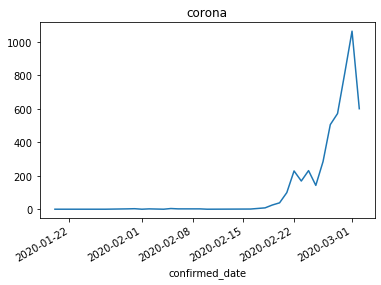

In [11]:


list = pd.date_range(start="2020-1-20", end="2020-2-28", freq="D")
list = pd.DataFrame(list)
list["y"] = 0
list.columns = ["ds","y"]

count = data.groupby(data["confirmed_date"]).id.count()
accumulate = count.cumsum()    

count.plot()
plt.title("corona")


Text(0.5, 1.0, 'accumulate')

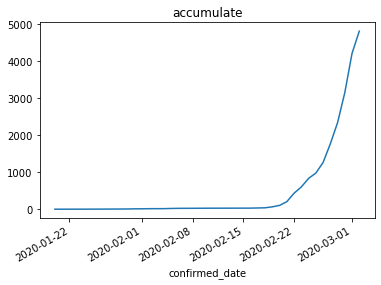

In [12]:
accumulate.plot()
plt.title("accumulate")


In [13]:
data = count.resample("D").first().fillna(0).cumsum()
data = data[28:]

data.values
data.index

DatetimeIndex(['2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02'],
              dtype='datetime64[ns]', name='confirmed_date', freq='D')

In [14]:
dataFrame = pd.DataFrame(data.index)


In [15]:
dataFrame["y"] = data.values
dataFrame.columns = ["ds","y"]
dataFrame

,ds,y
0,2020-02-17,30.0
1,2020-02-18,39.0
2,2020-02-19,65.0
3,2020-02-20,104.0
4,2020-02-21,204.0
5,2020-02-22,433.0
6,2020-02-23,602.0
7,2020-02-24,833.0
8,2020-02-25,976.0
9,2020-02-26,1261.0


In [16]:
model = Prophet()
model.fit(dataFrame)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [17]:
future = model.make_future_dataframe(periods=100)
future.tail()

,ds
110,2020-06-06
111,2020-06-07
112,2020-06-08
113,2020-06-09
114,2020-06-10


In [18]:
# 

In [22]:
predict=model.predict(future)

In [23]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-17,-828.548352,-980.737050,429.933042,-828.548352,-828.548352,539.319919,539.319919,539.319919,539.319919,539.319919,539.319919,0.0,0.0,0.0,-289.228433
1,2020-02-18,-517.003672,-1273.516198,121.399695,-517.003672,-517.003672,-65.901433,-65.901433,-65.901433,-65.901433,-65.901433,-65.901433,0.0,0.0,0.0,-582.905105
2,2020-02-19,-205.458992,-1136.451849,252.036164,-205.458992,-205.458992,-221.959184,-221.959184,-221.959184,-221.959184,-221.959184,-221.959184,0.0,0.0,0.0,-427.418176
3,2020-02-20,106.085688,-810.613967,618.052761,106.085688,106.085688,-261.519403,-261.519403,-261.519403,-261.519403,-261.519403,-261.519403,0.0,0.0,0.0,-155.433716
4,2020-02-21,417.630367,-524.299605,912.929698,417.630367,417.630367,-237.580875,-237.580875,-237.580875,-237.580875,-237.580875,-237.580875,0.0,0.0,0.0,180.049492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2020-06-06,33444.652431,32746.209238,34112.868062,33441.997943,33446.923194,-28.146011,-28.146011,-28.146011,-28.146011,-28.146011,-28.146011,0.0,0.0,0.0,33416.506420
111,2020-06-07,33756.228711,33324.828947,34787.973124,33753.562543,33758.523076,275.786987,275.786987,275.786987,275.786987,275.786987,275.786987,0.0,0.0,0.0,34032.015698
112,2020-06-08,34067.804990,33939.725364,35355.727228,34065.093434,34070.141547,539.319919,539.319919,539.319919,539.319919,539.319919,539.319919,0.0,0.0,0.0,34607.124909
113,2020-06-09,34379.381270,33605.191841,35055.874388,34376.622683,34381.742832,-65.901433,-65.901433,-65.901433,-65.901433,-65.901433,-65.901433,0.0,0.0,0.0,34313.479837


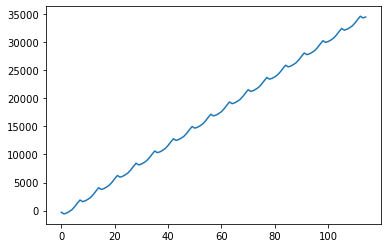

In [25]:
predict["yhat"].plot()